## Class 2  
Downloading and entering data  
Basic stats and plots  

In the last class you entered data yourself.  Most of the data analysis you will be doing in this class, and likely in the future, will be using available datasets from which you can extract the data you want to examine.  In the class you will practise downloading data sets and opening them as pandas dataframe ready for cleaning and subsetting (next week).  We start with a few examples but feel free to find your own datasets to experiment with.

In [21]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Easy start. 
Pandas has a method for directly reading in excel sheets  

    df = pd.read_excel('my_data.xls')  
    
and for reading in comma delineated files  

    df = pd.read_csv('my_data.csv')  
    
read in count.xls and count.csv

They are in the folder Datasets, which is in the folder above this one so the full path is:   
    ../Datasets/count.xls

In [2]:
df = pd.read_excel('../Datasets/count.xls')

In [3]:
df

,Field,Sheep,Goats,Barley,Oats
0,1,45,44,103,521
1,2,5,2,233,324
2,3,67,23,432,734
3,4,8,6,612,123
4,5,23,7,332,243
5,6,4,9,12,734
6,7,55,3,4,128
7,8,1,11,543,223
8,9,2,34,723,316
9,10,67,3,126,402


and for reading in comma delineated files

In [10]:
df = pd.read_csv('../Datasets/count.csv')

In [16]:
df

,Field,Sheep,Goats,Barley,Oats
0,1,45,44,103,521
1,2,5,2,233,324
2,3,67,23,432,734
3,4,8,6,612,123
4,5,23,7,332,243
5,6,4,9,12,734
6,7,55,3,4,128
7,8,1,11,543,223
8,9,2,34,723,316
9,10,67,3,126,402


But this only works if comma delimited.  This file is tab delinated.  Can you fix the read in command?

In [8]:
df = pd.read_csv('../Datasets/count.txt')

In [145]:
df

,Field\tSheep\tGoats\tBarley\tOats
0,1\t45\t44\t103\t521
1,2\t5\t2\t233\t324
2,3\t67\t23\t432\t734
3,4\t8\t6\t612\t123
4,5\t23\t7\t332\t243
5,6\t4\t9\t12\t734
6,7\t55\t3\t4\t128
7,8\t1\t11\t543\t223
8,9\t2\t34\t723\t316
9,10\t67\t3\t126\t402


We need to specify what the delimiter is, in this case, tabs. the parameter for delimiter is:
    
       sep =

You can also read in tab delinitaed files using pd.read_table().  Check this.

Once it's in you can check the file structure is as you expect using  

    df.info()  

which gives you the full story, or 
    
    df.dtypes  
    
which tells you how pandas has coded each column of data

Compare both outputs.

There are 3 duff datasets in ../Datasets/

    count_duff1.txt
    count_duff2.txt
    count_duff3.txt
 

Read each into a dataframe with header, counts as integers and the field number as a string.



Useful parameters:

    field separator: sep =
    specify the null values: na_values =
    set column headers: header=None (or specify a list)
    Make data a specified type: dtype={'Column_A': 'string'})
    ignore problematic rows: error_bad_lines=False

In [4]:
### Advice

count_duff1.txt has missing data as asterixs. The asterixes are causing pandas to code the columns as objects - it won't be possible to do calculations with this data.
We can specify that Pandas should treat the asterixs as missing data.

df = pd.read_csv('../Datasets/count_duff2.txt',sep ='\t', dtype={'Field': 'string'})

duff2 has an extra value on a row, so will not load.
df = pd.read_csv("count_duff3.txt", error_bad_lines=False)

duff3 needs column anmes attached
col_names = ["Meadow", "Pigs","Cows", "Potatoes","Turnips"]
df = pd.read_csv('../Datasets/count_duff3.txt',sep ='\t', header=None, names = col_names)
df


### The parts of a dataframe  
We've defined column headers, but there are also row labels in the left-most column.  This is the dataframe index

In [5]:
col_names = ["Meadow", "Pigs","Cows", "Potatoes","Turnips"]
df = pd.read_csv('../Datasets/count_things.txt',sep ='\t', header=None, names = col_names)
df

,Meadow,Pigs,Cows,Potatoes,Turnips
0,Waun_fach,45.0,44.0,103.0,521.0
1,Ffos_fawr,NaN,2.0,233.0,324.0
2,Aberheidol,67.0,23.0,432.0,734.0
3,Hen_cae,8.0,6.0,612.0,123.0
4,Glynan,23.0,NaN,332.0,243.0
5,Derwen,4.0,9.0,12.0,734.0
6,Llanwenant,55.0,NaN,NaN,128.0
7,Heol-y-bryn,1.0,11.0,543.0,223.0
8,Lan-y-mor,2.0,34.0,723.0,316.0
9,Pen-y-garn,67.0,3.0,NaN,NaN


We can call the columns as a list and the index as a list

In [18]:
df.columns

Index(['Meadow', 'Pigs', 'Cows', 'Potatoes', 'Turnips'], dtype='object')

What does the index look like?

The column and row headers are python sequences and you can pull out individual lables the same way you would access part of the python list

In [21]:
df.columns[3]

'Potatoes'

In [20]:
df.index[3]

3

You can re-name the index to more informative values - the field numbers

In [26]:
df.set_index('Meadow', inplace=True)

what happens if you don't set inplace=True?

In [23]:
df

,Pigs,Cows,Potatoes,Turnips
Meadow,,,,
Waun_fach,45.0,44.0,103.0,521.0
Ffos_fawr,NaN,2.0,233.0,324.0
Aberheidol,67.0,23.0,432.0,734.0
Hen_cae,8.0,6.0,612.0,123.0
Glynan,23.0,NaN,332.0,243.0
Derwen,4.0,9.0,12.0,734.0
Llanwenant,55.0,NaN,NaN,128.0
Heol-y-bryn,1.0,11.0,543.0,223.0
Lan-y-mor,2.0,34.0,723.0,316.0


We can pick out individual values by specifiying column and index

How many Cows in Meadow Hen_cae?

In [27]:
df.at['Hen_cae','Cows']

6.0

change this, adding a cow to the Hen_cae.  Use

    df.at[index, column] = 

### Trickier. 
Downloading data from a website and opening it.  
NCBI has a list of sequence genomes and their assembly metrics:
    
    INTRODUCTION
------------- 
species_genome_size.txt.gz provides the expected genome size for each species 
taxid with at least four assemblies in GenBank. The expected genome size range 
is used to identify outliers for a species that can result from errors. More
information about how the genome size ranges are calculated can be found
https://www.ncbi.nlm.nih.gov/assembly/help/genome-size-check/. 


The species_genome_size.txt.gz file has 5 tab-delimited columns. 
Header rows begin with '#".

Column  1: species_taxid
   Taxonomic identifier of each species 
  
Column  2: min_ungapped_length
   Minimum expected ungapped genome size of an assembly for the species 
   
Column  3: max_ungapped_length
   Maximum expected ungapped genome size of an assembly for the species 
   
Column  4: expected_ungapped_length
   Median genome assembly size of assemblies for the species 

Column  5: number_of_genomes
   Number of genomes used to calculate the expected size range
   

We will down load the file (using wget), unzip it (using gunzip), check it's structure (using head) and read it in.

Using "!" at the start of a line informs the notebook that the following is bash and not python

In [7]:
! wget https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/species_genome_size.txt.gz

--2023-08-04 11:11:16--  https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/species_genome_size.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.228, 130.14.250.13
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59264 (58K) [application/x-gzip]
Saving to: ‘species_genome_size.txt.gz’

species_genome_size 100%[===================>]  57.88K   267KB/s    in 0.2s    

2023-08-04 11:11:17 (267 KB/s) - ‘species_genome_size.txt.gz’ saved [59264/59264]



Unzip the datafile

In [8]:
! gunzip species_genome_size.txt.gz

In [ ]:
Use "! ls" to check what files you have now

Check the data file's format using head as a bash command

In [9]:
! head -3 species_genome_size.txt

#species_taxid	min_ungapped_length	max_ungapped_length	expected_ungapped_length	number_of_genomes	method_determined
9	318000	956000	636876	80	automatic
23	3680000	5522000	4631520	5	automatic


Read the data in. Which pd.read format would be best?

In [20]:
df = pd.read_table("species_genome_size.txt")

Check that pandas has interpreted the type of data correctly using dtypes

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4037 entries, 0 to 4036
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   #species_taxid            4037 non-null   int64 
 1   min_ungapped_length       4037 non-null   int64 
 2   max_ungapped_length       4037 non-null   int64 
 3   expected_ungapped_length  4037 non-null   int64 
 4   number_of_genomes         4037 non-null   int64 
 5   method_determined         4037 non-null   object
dtypes: int64(5), object(1)
memory usage: 189.4+ KB


#### What is the species with the most sequenced genomes?



df.max()['column'] will give you the maxiumum value for a column, but you want to also know the species id for this value.  

Try sorting the whole dataframe using 

    df.sort_values(by=['Column_name'])  
    
You can use 

    .tail(N)
    
to show just N rows

You can use 

    ascending=False
  
to show the highest values at the top

Make a quick histogram of the number of genomes using:

    sns.histplot(data=df, y="number_of_genomes")

<AxesSubplot:xlabel='number_of_genomes'>

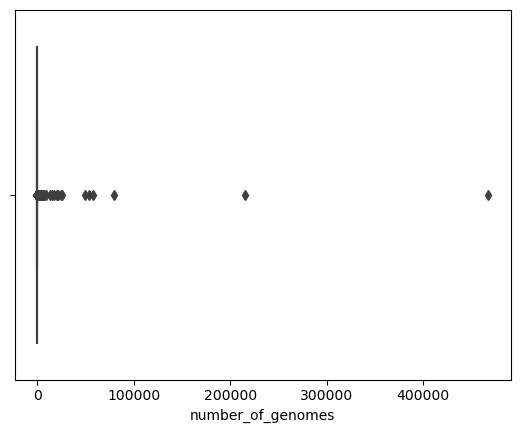

In [24]:
sns.boxplot(x=df["number_of_genomes"])

You can check the identity of any genome at NCBI:  

    https://www.ncbi.nlm.nih.gov/assembly/    

search by txid[species_taxid]   
txid[3707] is mustard, Brassica juncea  

Not all data is as tidy as the NCBI download.  Sometimes you need to exclude lines when you read in data.

### Tricky file formats

Open the excel sheet of data on agricultural productivy in the UK since 1973.  
This is from:
    
   https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1004686/AUK-Chapter5-13jul23.ods
        
This was originally in ods format file. It COULD be read in directly by installing the odf engine, but to save complictions I've provided it as an excel file. 

In [ ]:
../Datasets/AUK-Chapter5-13jul23.xlsx'

In [26]:
df = pd.read_excel('../Datasets/AUK-Chapter5-13jul23.xlsx')
df.head(10)

,Date of update: 13 July 2023,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Next update: July 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data for Tables 5.1 to 5.2 and Figures 5.1 to ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Enquiries: Tim Buttanshaw on +44 (0)20 8026 3601,NaN,NaN,NaN,NaN,NaN,Email: farmaccounts@defra.gov.uk,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1973 = 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,1973.0,1974.000000,1975.000000,1976.000000,1977.000000,1978,1979.000000,1980.000000,1981.000000,...,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000,2022.000000
8,1 Output of cereals,100.0,106.495639,96.861286,89.477469,110.017057,119.097829,123.214382,145.505545,153.275035,...,159.185468,204.371418,207.873040,183.962101,187.381859,167.727641,206.282808,143.027317,175.497720,183.789535
9,wheat,100.0,111.061991,98.020137,92.535909,99.814874,118.013991,136.718803,167.555883,169.366646,...,221.868376,320.422202,320.214118,282.738719,284.765282,254.079302,307.525725,175.039016,262.137395,266.115915


At least it reads in, but it's clearly not right - the first few rows are not data.  We need to exclude them, here we do this by setting as header the first line of data.

Specify which of the input rows should be the header with 
    
    header = N   
    
Remember that pandas is 0-indexed.

In [27]:
df = pd.read_excel('../Datasets/AUK-Chapter5-13jul23.xlsx', header =8)
df.head(3)

,Unnamed: 0,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1 Output of cereals,100.0,106.495639,96.861286,89.477469,110.017058,119.097829,123.214382,145.505545,153.275035,...,159.446117,159.185468,204.371418,207.873040,183.962101,187.381859,167.727641,206.282808,143.025361,175.620653
1,wheat,100.0,111.061991,98.020137,92.535909,99.814874,118.013991,136.718803,167.555883,169.366646,...,257.804953,221.868376,320.422202,320.214117,282.738719,284.765281,254.079302,307.525725,175.034456,265.165192
2,rye,100.0,80.000000,80.000000,90.000000,130.000000,160.000000,140.000000,140.000000,140.000000,...,150.000000,200.000000,200.000000,200.000000,200.000000,170.000000,200.000000,200.000000,170.000000,170.000000


We could also skip rows using 

    skiprows=N
    
What should N be here?

In [180]:
df = pd.read_excel('../Datasets/AUK-Chapter5-13jul23.xlsx', skiprows=8)
df.head(3)

,Unnamed: 0,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1 Output of cereals,100.0,106.495639,96.861286,89.477469,110.017058,119.097829,123.214382,145.505545,153.275035,...,159.446117,159.185468,204.371418,207.873040,183.962101,187.381859,167.727641,206.282808,143.025361,175.620653
1,wheat,100.0,111.061991,98.020137,92.535909,99.814874,118.013991,136.718803,167.555883,169.366646,...,257.804953,221.868376,320.422202,320.214117,282.738719,284.765281,254.079302,307.525725,175.034456,265.165192
2,rye,100.0,80.000000,80.000000,90.000000,130.000000,160.000000,140.000000,140.000000,140.000000,...,150.000000,200.000000,200.000000,200.000000,200.000000,170.000000,200.000000,200.000000,170.000000,170.000000


The end of the file is untidy as well

In [28]:
df.tail(10)

,Unnamed: 0,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
61,Productivity by capital consumption (11 divide...,100.0,100.436272,95.213292,91.518622,96.232506,99.003838,99.954277,102.084655,101.683516,...,109.835561,109.863074,116.119230,116.754599,112.773776,115.308385,111.330628,114.804065,108.909504,111.420744
62,Productivity by labour (11 divided by 23),100.0,104.915892,102.630282,101.920775,110.686948,117.045602,121.915979,128.373984,130.988725,...,240.800285,247.138732,264.299931,268.108751,262.130803,271.174793,263.851852,273.587776,260.177585,267.253146
63,Productivity by land (11 divided by 24),100.0,100.740438,97.074194,94.570771,101.351266,105.924040,108.467968,111.874632,112.091873,...,126.740968,128.533235,137.807161,141.254010,135.571561,140.046280,137.736987,142.170019,136.177301,140.092633
64,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,(a) This table presents volume indices for all...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,(b) To increase the usability and transparity ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,(c) AHDB stopped producing potato yield data a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,"(d) We have renamed cattle, sheep, and pigs pr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,© Crown copyright 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Use  

    skipfooter=
    
To tidy this up

In [31]:
df = pd.read_excel('../Datasets/AUK-Chapter5-13jul23.xlsx',  skiprows=8, skipfooter=8)
df.tail(5)

,Unnamed: 0,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
59,Total factor productivity (11 divided by 25),100,106.270373,102.466371,98.229813,105.162556,109.321832,109.610859,114.700987,116.733463,...,146.359263,155.247590,156.507594,151.431257,156.934681,155.578564,161.639211,154.313081,161.788666,167.271345
60,Productivity by intermediate consumption (11 d...,100,107.877523,103.645620,97.716844,104.270679,107.745413,105.913039,111.075551,113.443675,...,119.363257,125.972545,126.305593,121.709854,126.688681,127.769954,133.220825,127.189961,135.353791,143.498895
61,Productivity by capital consumption (11 divide...,100,100.436272,95.213292,91.518623,96.232506,99.003838,99.954276,102.084655,101.683516,...,109.856220,116.111985,116.747315,112.766740,115.301191,111.317076,114.797672,109.211889,112.098037,112.170125
62,Productivity by labour (11 divided by 23),100,104.915892,102.630282,101.920775,110.686948,117.045601,121.915979,128.373983,130.988725,...,247.123313,264.283442,268.092024,262.114449,271.157874,263.819732,273.572541,261.050528,269.367027,269.005389
63,Productivity by land (11 divided by 24),100,100.740438,97.074194,94.570771,101.351266,105.924040,108.467968,111.874632,112.091873,...,128.525216,137.798562,141.245197,135.563103,140.037542,137.720219,142.162102,136.635014,141.715292,144.899441


Check the dataframe is as you expect using df.info()

Empty rows are automatically skipped (compare the excel file with what is read in), but rows which are moslty empty are filled with NaN.  We can remove these.  
(inplace=True) makes the change happend on the original dataframe


In [32]:
df.dropna(inplace=True)

or drop just the columns where there are missing values:

In [62]:
df.dropna(axis='columns',inplace=True)

or the rows with more than 2 missing values

In [63]:
df.dropna(thresh=2,inplace=True)

or rows with missing values in specific columns

In [64]:
df.dropna(subset=[1983, 1997],inplace=True)

To examine this data it makes more sense to have outputs as columns.  We can transpose the dataframe using df.T

In [33]:
df = df.T

use 

    df.head(N) 
    
to check this has worked.

In [34]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
Unnamed: 0,1 Output of cereals,wheat,rye,barley,oats and summer cereal mixtures,other cereals,2 Output of industrial crops,oil seeds,oilseed rape,other oil seeds,...,23 All Labour,Compensation of employees,Entrepreneurial workers (farm and specialist c...,24 Land,25 All Inputs and Entrepreneurial Labour,Total factor productivity (11 divided by 25),Productivity by intermediate consumption (11 d...,Productivity by capital consumption (11 divide...,Productivity by labour (11 divided by 23),Productivity by land (11 divided by 24)
1973,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1974,106.495639,111.061991,80.0,102.990299,87.693467,100.0,77.171516,170.967742,170.967742,100.0,...,98.277063,98.010011,98.502774,102.350415,97.024461,106.270373,107.877523,100.436272,104.915892,100.740438


Now we have the years as the row names, and the types of output as row one.  
How to fix this and make the types of output column headers?  

iloc[N]  gives row N values as a list.  We can use this to specify new column names.

In [35]:
df.columns = df.iloc[0]

Check with df.head

In [36]:
df.head(3)

Unnamed: 0,1 Output of cereals,wheat,rye,barley,oats and summer cereal mixtures,other cereals,2 Output of industrial crops,oil seeds,oilseed rape,other oil seeds,...,23 All Labour,Compensation of employees,Entrepreneurial workers (farm and specialist contractor),24 Land,25 All Inputs and Entrepreneurial Labour,Total factor productivity (11 divided by 25),Productivity by intermediate consumption (11 divided by 21),Productivity by capital consumption (11 divided by 22),Productivity by labour (11 divided by 23),Productivity by land (11 divided by 24)
Unnamed: 0,1 Output of cereals,wheat,rye,barley,oats and summer cereal mixtures,other cereals,2 Output of industrial crops,oil seeds,oilseed rape,other oil seeds,...,23 All Labour,Compensation of employees,Entrepreneurial workers (farm and specialist c...,24 Land,25 All Inputs and Entrepreneurial Labour,Total factor productivity (11 divided by 25),Productivity by intermediate consumption (11 d...,Productivity by capital consumption (11 divide...,Productivity by labour (11 divided by 23),Productivity by land (11 divided by 24)
1973,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1974,106.495639,111.061991,80.0,102.990299,87.693467,100.0,77.171516,170.967742,170.967742,100.0,...,98.277063,98.010011,98.502774,102.350415,97.024461,106.270373,107.877523,100.436272,104.915892,100.740438


We can now drop the redundant row 1.  There are lots of ways to do this!  

Drop by index name of row

In [37]:
hm = df.drop(['Unnamed: 0'])

In [76]:
hm.head(3)

Unnamed: 0,1 Output of cereals,wheat,rye,barley,oats and summer cereal mixtures,other cereals,2 Output of industrial crops,oil seeds,oilseed rape,other oil seeds,...,23 All Labour,Compensation of employees,Entrepreneurial workers (farm and specialist contractor),24 Land,25 All Inputs and Entrepreneurial Labour,Total factor productivity (11 divided by 25),Productivity by intermediate consumption (11 divided by 21),Productivity by capital consumption (11 divided by 22),Productivity by labour (11 divided by 23),Productivity by land (11 divided by 24)
1973,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1974,106.495639,111.061991,80.0,102.990299,87.693467,100.0,77.171516,170.967742,170.967742,100.0,...,98.277062,98.010011,98.502774,102.350415,97.024461,106.270373,107.877523,100.436272,104.915892,100.740438
1975,96.861286,98.020137,80.0,96.847398,62.6791,100.0,81.083126,216.129032,216.129032,100.0,...,96.592017,96.102746,97.005548,102.120508,96.746531,102.466371,103.64562,95.213292,102.630282,97.074194


Drop by index range

In [38]:
gr = df[1:]

In [39]:
gr.head(3)

Unnamed: 0,1 Output of cereals,wheat,rye,barley,oats and summer cereal mixtures,other cereals,2 Output of industrial crops,oil seeds,oilseed rape,other oil seeds,...,23 All Labour,Compensation of employees,Entrepreneurial workers (farm and specialist contractor),24 Land,25 All Inputs and Entrepreneurial Labour,Total factor productivity (11 divided by 25),Productivity by intermediate consumption (11 divided by 21),Productivity by capital consumption (11 divided by 22),Productivity by labour (11 divided by 23),Productivity by land (11 divided by 24)
1973,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1974,106.495639,111.061991,80.0,102.990299,87.693467,100.0,77.171516,170.967742,170.967742,100.0,...,98.277063,98.010011,98.502774,102.350415,97.024461,106.270373,107.877523,100.436272,104.915892,100.740438
1975,96.861286,98.020137,80.0,96.847398,62.6791,100.0,81.083126,216.129032,216.129032,100.0,...,96.592017,96.102746,97.005548,102.120508,96.746531,102.466371,103.64562,95.213292,102.630282,97.074194


Drop by index location

In [40]:
ha = df.drop(df.index[0])

In [41]:
ha.head(3)

Unnamed: 0,1 Output of cereals,wheat,rye,barley,oats and summer cereal mixtures,other cereals,2 Output of industrial crops,oil seeds,oilseed rape,other oil seeds,...,23 All Labour,Compensation of employees,Entrepreneurial workers (farm and specialist contractor),24 Land,25 All Inputs and Entrepreneurial Labour,Total factor productivity (11 divided by 25),Productivity by intermediate consumption (11 divided by 21),Productivity by capital consumption (11 divided by 22),Productivity by labour (11 divided by 23),Productivity by land (11 divided by 24)
1973,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1974,106.495639,111.061991,80.0,102.990299,87.693467,100.0,77.171516,170.967742,170.967742,100.0,...,98.277063,98.010011,98.502774,102.350415,97.024461,106.270373,107.877523,100.436272,104.915892,100.740438
1975,96.861286,98.020137,80.0,96.847398,62.6791,100.0,81.083126,216.129032,216.129032,100.0,...,96.592017,96.102746,97.005548,102.120508,96.746531,102.466371,103.64562,95.213292,102.630282,97.074194


It will be useful to have the years as a column, not an index

Make the index into a new column using df.rest_index().  Check it's worked.

In [42]:
df=ha.reset_index()

In [43]:
df.head(3)

Unnamed: 0,index,1 Output of cereals,wheat,rye,barley,oats and summer cereal mixtures,other cereals,2 Output of industrial crops,oil seeds,oilseed rape,...,23 All Labour,Compensation of employees,Entrepreneurial workers (farm and specialist contractor),24 Land,25 All Inputs and Entrepreneurial Labour,Total factor productivity (11 divided by 25),Productivity by intermediate consumption (11 divided by 21),Productivity by capital consumption (11 divided by 22),Productivity by labour (11 divided by 23),Productivity by land (11 divided by 24)
0,1973,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,1974,106.495639,111.061991,80.0,102.990299,87.693467,100.0,77.171516,170.967742,170.967742,...,98.277063,98.010011,98.502774,102.350415,97.024461,106.270373,107.877523,100.436272,104.915892,100.740438
2,1975,96.861286,98.020137,80.0,96.847398,62.6791,100.0,81.083126,216.129032,216.129032,...,96.592017,96.102746,97.005548,102.120508,96.746531,102.466371,103.64562,95.213292,102.630282,97.074194


We also need to rename the new column. Specify which column to work on by putting the index in the square brackets and specify the new name.

    df.columns.values[ ] = "New_Name"

In [44]:
df.columns.values[0] = "Year"

In [84]:
df.head(3)

Unnamed: 0,Year,1 Output of cereals,wheat,rye,barley,oats and summer cereal mixtures,other cereals,2 Output of industrial crops,oil seeds,oilseed rape,...,23 All Labour,Compensation of employees,Entrepreneurial workers (farm and specialist contractor),24 Land,25 All Inputs and Entrepreneurial Labour,Total factor productivity (11 divided by 25),Productivity by intermediate consumption (11 divided by 21),Productivity by capital consumption (11 divided by 22),Productivity by labour (11 divided by 23),Productivity by land (11 divided by 24)
0,1973,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,1974,106.495639,111.061991,80.0,102.990299,87.693467,100.0,77.171516,170.967742,170.967742,...,98.277062,98.010011,98.502774,102.350415,97.024461,106.270373,107.877523,100.436272,104.915892,100.740438
2,1975,96.861286,98.020137,80.0,96.847398,62.6791,100.0,81.083126,216.129032,216.129032,...,96.592017,96.102746,97.005548,102.120508,96.746531,102.466371,103.64562,95.213292,102.630282,97.074194


Now we can check what we have.  Use

    df.info()
    
to see what the columns are and which are numeric

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 65 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Year                                                         50 non-null     int64 
 1   1 Output of cereals                                          50 non-null     object
 2   wheat                                                        50 non-null     object
 3   rye                                                          50 non-null     object
 4   barley                                                       50 non-null     object
 5   oats and summer cereal mixtures                              50 non-null     object
 6   other cereals                                                50 non-null     object
 7   2 Output of industrial crops                                 50 non-null     object
 8   oi

All our data columns are coded as objects now (due to the text in the column names when they were row1).  We can fix this by applying pd.to_numeric across the dataframe.

In [99]:
df = df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 65 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Year                                                         49 non-null     int64  
 1   1 Output of cereals                                          49 non-null     float64
 2   wheat                                                        49 non-null     float64
 3   rye                                                          49 non-null     float64
 4   barley                                                       49 non-null     float64
 5   oats and summer cereal mixtures                              49 non-null     float64
 6   other cereals                                                49 non-null     float64
 7   2 Output of industrial crops                                 49 non-null     float

Now we can plot changes in agricultural output since 1973!

Use sns.lineplot to look at changes in any agricultural output.  
Use list(df.columns) to see your options

In [199]:
list(df.columns)

['Year',
 '1 Output of cereals',
 'wheat',
 'rye ',
 'barley',
 'oats and summer cereal mixtures',
 'other cereals',
 '2 Output of industrial crops',
 'oil seeds ',
 'oilseed rape',
 'other oil seeds',
 'protein crops',
 'sugar beet',
 'other industrial crops',
 '3 Output of forage plants',
 '4 Output of vegetables and horticultural products',
 'fresh vegetables',
 'plants and flowers',
 '5 Output of potatoes (c) ',
 '6 Output of fruit',
 '7 Output of other crop products ',
 'Total crop output (sum 1 - 7)',
 '8 Output of livestock (meat) (d)',
 'cattle',
 'pigs ',
 'sheep',
 'poultry ',
 'other animals',
 '9 Output of livestock products',
 'milk',
 'eggs',
 'raw wool',
 'other animal products',
 'Total livestock output (8 + 9)',
 '10 Inseparable non-agricultural activities',
 '11 All outputs',
 '12 Seeds',
 '13 Energy',
 'electricity and fuels for heating',
 'motor and machinery fuels',
 '14 Fertilisers',
 '15 Plant protection products',
 '16 Veterinary expenses',
 '17 Animal feed',
 '

<AxesSubplot:xlabel='Year', ylabel='plants and flowers'>

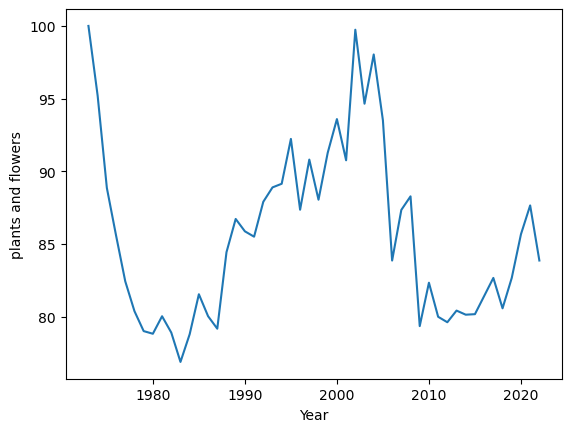

In [46]:
sns.lineplot(x=df['Year'], y=df['plants and flowers'])

<AxesSubplot:xlabel='Year', ylabel='4 Output of vegetables and horticultural products'>

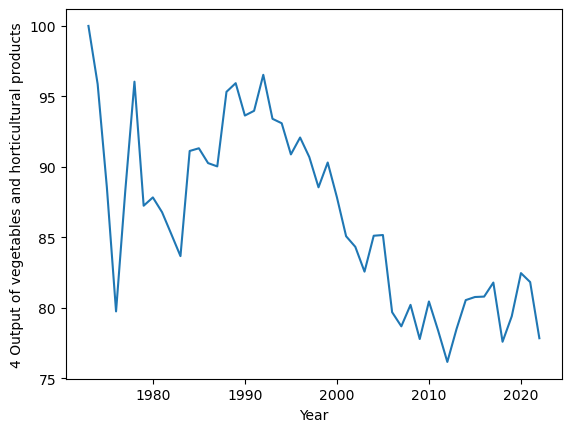

In [48]:
sns.lineplot(x=df['Year'], y=df['4 Output of vegetables and horticultural products'])

<AxesSubplot:xlabel='Year', ylabel='sugar beet'>

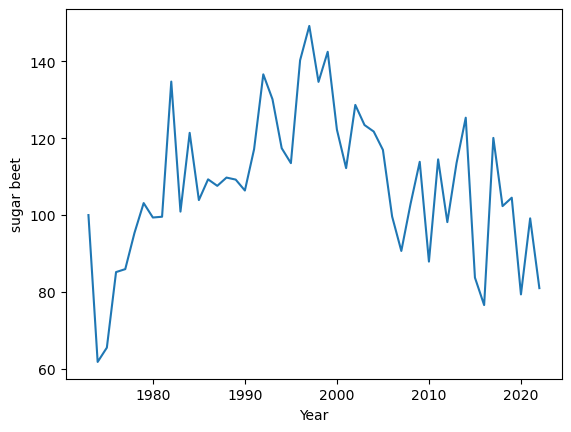

In [50]:
sns.lineplot(x=df['Year'], y=df['sugar beet'])

Can you see the effect of the foot and mouth outbreak?  the green revolution in grain productivity, the switch to imported fruit and vegetables?

### Saving dataframes

Save as csv

In [227]:
df.to_csv('UK_agriculture.csv', index=False)

Save as excel

In [228]:
df.to_excel('UK_agriculture.xlsx', index=False)

What happens if you leave off 'index=False'?

#### Pickling  
Sometime you are working solely within python and want to preserve the syntax exactly rather than writing to a flat csv or excel file




In [59]:
df.to_pickle('UK_crops.pkl')

Reading from pickle

In [60]:
df = pd.read_pickle('UK_crops.pkl')

Checking contents

In [61]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Production(2015=100)  65 non-null     object 
 1   1973                  64 non-null     float64
 2   1974                  64 non-null     float64
 3   1975                  64 non-null     float64
 4   1976                  64 non-null     float64
 5   1977                  64 non-null     float64
 6   1978                  64 non-null     float64
 7   1979                  64 non-null     float64
 8   1980                  64 non-null     float64
 9   1981                  64 non-null     float64
 10  1982                  64 non-null     float64
 11  1983                  64 non-null     float64
 12  1984                  64 non-null     float64
 13  1985                  64 non-null     float64
 14  1986                  64 non-null     float64
 15  1987                  64 